# Vortex Lattice Method

### Javier Lendínez Castillo
 02/04/2024



In [15]:
import numpy as np
from lib import calculate_wing_geometry, interpolate_wing_points, generate_wing_panels, curvature, plot_wing, plot_wing_discretization, plot_wing_heatmap, plot_wing_lift, wing

# Parámetros del ala
u = 50                                  # Velocidad de vuelo en m/s
rho = 0.957                             # Densidad del aire en kg/m^3 a 2500 m de altitud
NACA_root = "3215"                      # Perfil en el encastre
NACA_tip = "1310"                       # Perfil en la punta
alpha = np.radians(3)                   # Ángulo de ataque en radianes
taper_ratio = 0.8                       # Estrechamiento (cuerda en punta/cuerda en raíz-encastre)
sweep = np.radians(30)                  # Flecha (ángulo que forma la línea que une los centros aerodinámicos con el eje de coordenadas "y")
chord_root = 1                          # Cuerda en la raiz 
chord_tip = taper_ratio * chord_root    # Cuerda en la punta
wing_span = 2 * (4 * chord_root)        # Envergadura 

n = 60                                  # Número de paneles a lo largo de la envergadura
m = 6                                   # Número de paneles a lo largo de la cuerda

# Geometría del ala
wing_geometry = calculate_wing_geometry(chord_root, chord_tip, wing_span, sweep)

# Discretrización del ala
wing_vertical_points, wing_horizontal_points = interpolate_wing_points(wing_geometry, n=n+1, m=m+1)  # Interpolar puntos del ala
panel_data, panel_lengths = generate_wing_panels(wing_vertical_points, wing_horizontal_points)

# Curvatura a lo largo de la cuerda en toda la envergadura del ala
dz_c = curvature(NACA_root, NACA_tip, wing_horizontal_points, alpha, panel_data, chord_root, chord_tip, n, m)  # Calcular la curvatura en cada punto de control

# Calcular la sustentación del ala
w_i, P_ij, gammas, lift, lift_sum, CL = wing(panel_data, u, dz_c, alpha, rho, sweep, panel_lengths, n, m, wing_span)

Total Lift: 2959.6364956519824
CL: 0.309261911771367


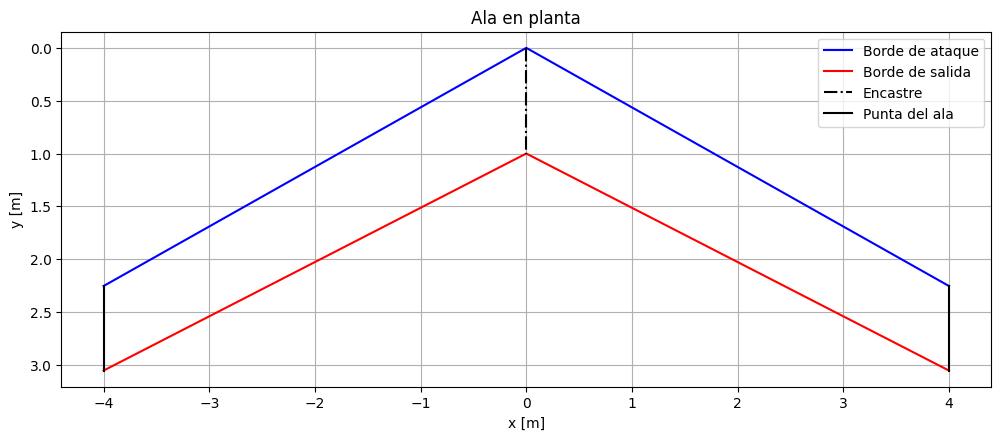

In [16]:
plot_wing(wing_geometry, wing_span)

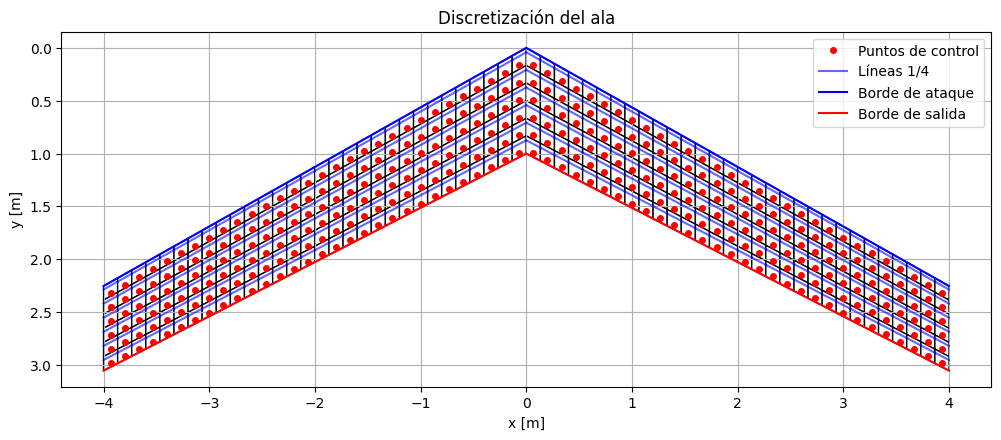

In [17]:
plot_wing_discretization(panel_data, wing_geometry)

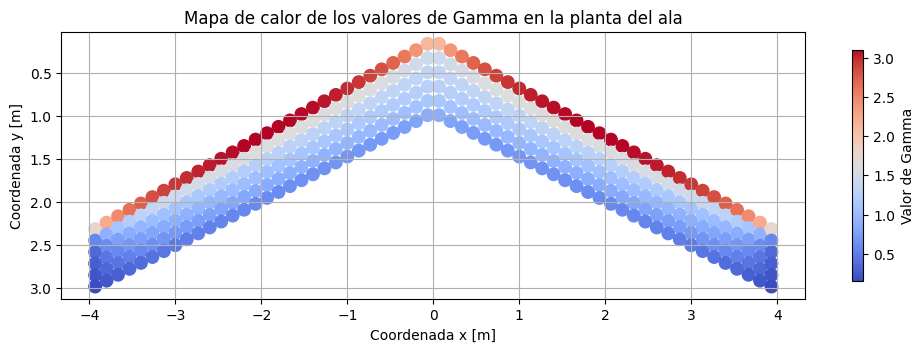

In [18]:
plot_wing_heatmap(panel_data, gammas)

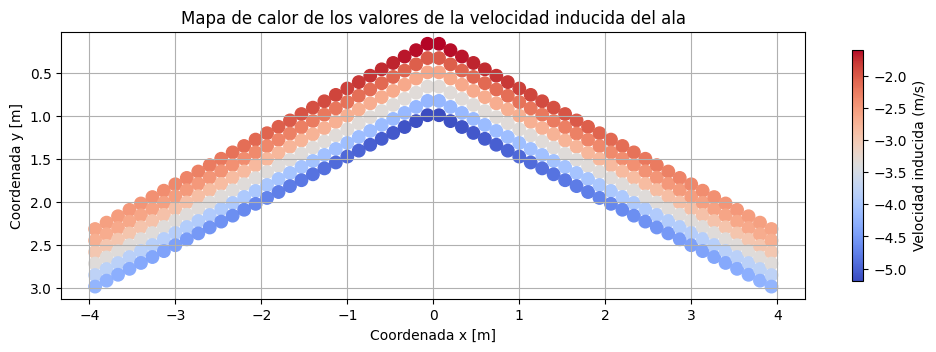

In [19]:
plot_wing_heatmap(panel_data, w_i, title="Mapa de calor de los valores de la velocidad inducida del ala", legend="Velocidad inducida (m/s)")

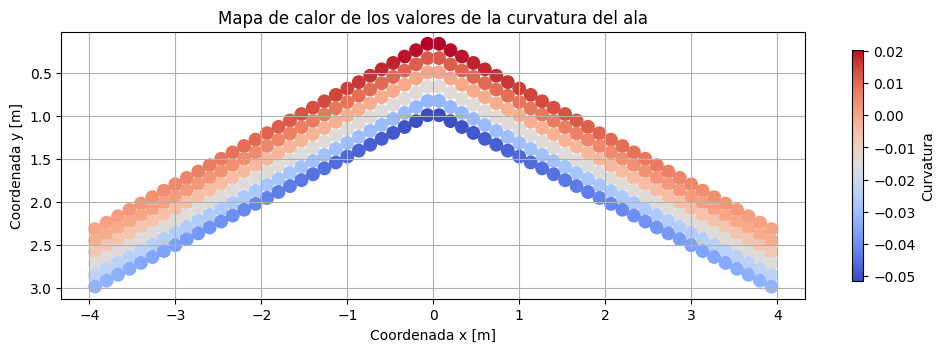

In [20]:
plot_wing_heatmap(panel_data, dz_c, title="Mapa de calor de los valores de la curvatura del ala", legend="Curvatura")

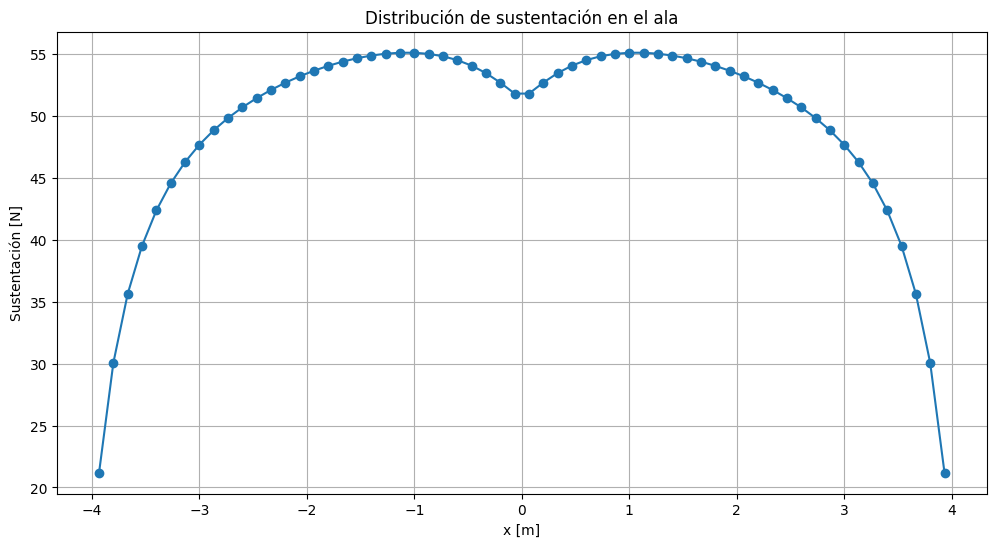

Total Lift: 2959.6364956519824
CL: 0.309261911771367


In [21]:
# Dibujar la distribución de sustentación en el ala en los puntos de control
plot_wing_lift(panel_data, lift_sum)
print("Total Lift:", lift)
print("CL:", CL)